### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score

### Loading Dataset

In [2]:
application_test=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/application_test.csv')
application_train=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/application_train.csv')
bureau=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/bureau.csv')
bureau_balance=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/bureau_balance.csv')
credit_card_balance=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/credit_card_balance.csv')
installments_payments=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/installments_payments.csv')
POS_CASH_balance=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/POS_CASH_balance.csv')
previous_application=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/previous_application.csv')

### Defining some useful functions

In [3]:
def basic_info(df):
    print('Num of rows and columns: ',df.shape)
    print('Missing value status: ',df.isnull().values.any())
    print('Columns names:\n ',df.columns.values)
    return df.head()

In [4]:
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
def categorical_features(df):
    cat_features=df.columns[df.dtypes=='object']
    return list(cat_features)

In [6]:
def onehot_encoding(df,cat_features_name):
    df=pd.get_dummies(df,columns=cat_features_name)
    return df

### pre-processing bureau

In [7]:
basic_info(bureau)

Num of rows and columns:  (1716428, 17)
Missing value status:  True
Columns names:
  ['SK_ID_CURR' 'SK_ID_BUREAU' 'CREDIT_ACTIVE' 'CREDIT_CURRENCY'
 'DAYS_CREDIT' 'CREDIT_DAY_OVERDUE' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'AMT_CREDIT_MAX_OVERDUE' 'CNT_CREDIT_PROLONG'
 'AMT_CREDIT_SUM' 'AMT_CREDIT_SUM_DEBT' 'AMT_CREDIT_SUM_LIMIT'
 'AMT_CREDIT_SUM_OVERDUE' 'CREDIT_TYPE' 'DAYS_CREDIT_UPDATE' 'AMT_ANNUITY']


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
categorical_features(bureau)

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

In [9]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [10]:
bureau.CREDIT_CURRENCY.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [11]:
bureau.CREDIT_TYPE.value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [12]:
check_missing_data(bureau)[0:9]

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000


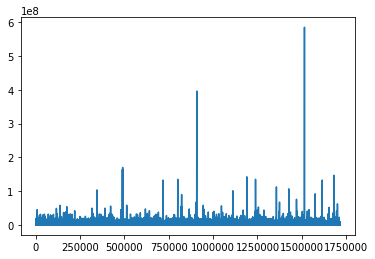

In [13]:
bureau.AMT_CREDIT_SUM.plot()

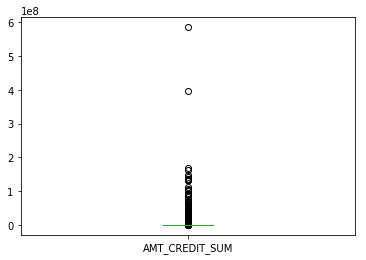

In [14]:
bureau.AMT_CREDIT_SUM.plot(kind='box')

In [15]:
bureau.AMT_CREDIT_SUM.describe()

count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
25%      5.130000e+04
50%      1.255185e+05
75%      3.150000e+05
max      5.850000e+08
Name: AMT_CREDIT_SUM, dtype: float64

In [16]:
print(bureau.AMT_CREDIT_SUM.max())
print(bureau.AMT_CREDIT_SUM.mean())
print(bureau.AMT_CREDIT_SUM.median())

585000000.0
354994.59191767266
125518.5


Filling the NAN values in AMT_CREDIT_SUM column by median value.

In [17]:
bureau.AMT_CREDIT_SUM.fillna(value=bureau.AMT_CREDIT_SUM.median(),inplace=True)

In [18]:
bureau.DAYS_CREDIT_ENDDATE.describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

Filling the NAN values in 'DAYS_CREDIT_ENDDATE' column by values in "DAYS_ENDDATE_FACT", if it is posible. 

In [19]:
bureau['DAYS_CREDIT_ENDDATE']=np.where(bureau.DAYS_CREDIT_ENDDATE.isnull(),bureau.DAYS_ENDDATE_FACT,bureau.DAYS_CREDIT_ENDDATE)

In [20]:
bureau.DAYS_CREDIT_ENDDATE.describe()

count    1.643664e+06
mean     4.906971e+02
std      4.946554e+03
min     -4.206000e+04
25%     -1.125000e+03
50%     -3.310000e+02
75%      4.480000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

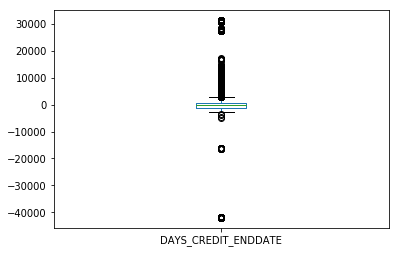

In [21]:
bureau.DAYS_CREDIT_ENDDATE.plot(kind='box')

Filling the remaining NAN values in DAYS_CREDIT_ENDDATE by 0

In [22]:
bureau.DAYS_CREDIT_ENDDATE.fillna(value=0.0,inplace=True)

In [23]:
bureau.drop('DAYS_ENDDATE_FACT',axis=1,inplace=True)

In [24]:
#bureau[['AMT_ANNUITY','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_DEBT']]

In [25]:
bureau[['AMT_ANNUITY','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_DEBT']].describe()

,AMT_ANNUITY,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_DEBT
count,4.896370e+05,5.919400e+05,1.124648e+06,1.458759e+06
mean,1.571276e+04,3.825418e+03,6.229515e+03,1.370851e+05
std,3.258269e+05,2.060316e+05,4.503203e+04,6.774011e+05
min,0.000000e+00,0.000000e+00,-5.864061e+05,-4.705600e+06
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.350000e+04,0.000000e+00,0.000000e+00,4.015350e+04
max,1.184534e+08,1.159872e+08,4.705600e+06,1.701000e+08


In [26]:
bureau.AMT_CREDIT_MAX_OVERDUE.fillna(0.0,inplace=True)

In [27]:
bureau.AMT_CREDIT_SUM_LIMIT.fillna(0.0,inplace=True)

In [28]:
bureau.AMT_CREDIT_SUM_DEBT.fillna(0.0,inplace=True)

In [29]:
bureau.drop('AMT_ANNUITY',axis=1,inplace=True)

In [30]:
check_missing_data(bureau).head()

,Total,Percent
DAYS_CREDIT_UPDATE,0,0.0
CREDIT_TYPE,0,0.0
AMT_CREDIT_SUM_OVERDUE,0,0.0
AMT_CREDIT_SUM_LIMIT,0,0.0
AMT_CREDIT_SUM_DEBT,0,0.0


In [31]:
bureau_onehot=onehot_encoding(bureau,categorical_features(bureau))
bureau_onehot.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,0.0,0,91323.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,0.0,0,225000.0,171342.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,0.0,0,464323.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,0.0,0.0,0,90000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,77674.5,0,2700000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
check_missing_data(bureau_onehot).head()

,Total,Percent
CREDIT_TYPE_Unknown type of loan,0,0.0
AMT_CREDIT_SUM_DEBT,0,0.0
CREDIT_ACTIVE_Closed,0,0.0
CREDIT_ACTIVE_Bad debt,0,0.0
CREDIT_ACTIVE_Active,0,0.0


### pre-processing bureau_balance

In [33]:
basic_info(bureau_balance)

Num of rows and columns:  (27299925, 3)
Missing value status:  False
Columns names:
  ['SK_ID_BUREAU' 'MONTHS_BALANCE' 'STATUS']


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [34]:
month_count=bureau_balance.groupby('SK_ID_BUREAU').size()

In [35]:
bureau_balance.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [36]:
bureau_balance_unstack=bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].value_counts(normalize = False).unstack('STATUS')
bureau_balance_unstack.columns=['status_DPD0','status_DPD1','status_DPD2','status_DPD3','status_DPD4','status_DPD5','status_closed','status_X']
bureau_balance_unstack['month_count']=month_count
bureau_balance_unstack.fillna(value=0,inplace=True)
bureau_balance_unstack.head()

,status_DPD0,status_DPD1,status_DPD2,status_DPD3,status_DPD4,status_DPD5,status_closed,status_X,month_count
SK_ID_BUREAU,,,,,,,,,
5001709,0.0,0.0,0.0,0.0,0.0,0.0,86.0,11.0,97
5001710,5.0,0.0,0.0,0.0,0.0,0.0,48.0,30.0,83
5001711,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
5001712,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,19
5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,22


### Merge bureau and bureau_balance

In [37]:
bureau_merge=bureau_onehot.merge(bureau_balance_unstack,how='left',on='SK_ID_BUREAU')

In [38]:
cnt_id_bureau=bureau_merge[['SK_ID_CURR','SK_ID_BUREAU']].groupby('SK_ID_CURR').size()

In [39]:
bureau_final_median=bureau_merge.groupby('SK_ID_CURR').median().drop('SK_ID_BUREAU',axis=1)
bureau_final_median['cnt_id_bureau']=cnt_id_bureau
bureau_final_median.fillna(0,inplace=True)
bureau_final_median.head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,status_DPD0,status_DPD1,status_DPD2,status_DPD3,status_DPD4,status_DPD5,status_closed,status_X,month_count,cnt_id_bureau
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-857.0,0.0,-179.0,0.0,0.0,168345.00,0.0,0.0,0.0,-155.0,...,2.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,29.0,7
100002,-1042.5,0.0,-24.0,0.0,0.0,54130.50,0.0,0.0,0.0,-402.5,...,5.0,4.0,0.0,0.0,0.0,0.0,2.0,2.5,16.0,8
100003,-1205.5,0.0,-480.0,0.0,0.0,92576.25,0.0,0.0,0.0,-545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
100004,-867.0,0.0,-488.5,0.0,0.0,94518.90,0.0,0.0,0.0,-532.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
100005,-137.0,0.0,122.0,0.0,0.0,58500.00,25321.5,0.0,0.0,-31.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3


In [ ]:
bureau_final_agg=bureau_merge.groupby('SK_ID_CURR').agg(['min','max','mean','median','sum']).drop('SK_ID_BUREAU',axis=1)
bureau_final_agg['cnt_id_bureau']=cnt_id_bureau
bureau_final_agg.fillna(0,inplace=True)
bureau_final_agg.head()

### pre-processing previous_application.csv

In [40]:
basic_info(previous_application)

Num of rows and columns:  (1670214, 37)
Missing value status:  True
Columns names:
  ['SK_ID_PREV' 'SK_ID_CURR' 'NAME_CONTRACT_TYPE' 'AMT_ANNUITY'
 'AMT_APPLICATION' 'AMT_CREDIT' 'AMT_DOWN_PAYMENT' 'AMT_GOODS_PRICE'
 'WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'
 'FLAG_LAST_APPL_PER_CONTRACT' 'NFLAG_LAST_APPL_IN_DAY'
 'RATE_DOWN_PAYMENT' 'RATE_INTEREST_PRIMARY' 'RATE_INTEREST_PRIVILEGED'
 'NAME_CASH_LOAN_PURPOSE' 'NAME_CONTRACT_STATUS' 'DAYS_DECISION'
 'NAME_PAYMENT_TYPE' 'CODE_REJECT_REASON' 'NAME_TYPE_SUITE'
 'NAME_CLIENT_TYPE' 'NAME_GOODS_CATEGORY' 'NAME_PORTFOLIO'
 'NAME_PRODUCT_TYPE' 'CHANNEL_TYPE' 'SELLERPLACE_AREA'
 'NAME_SELLER_INDUSTRY' 'CNT_PAYMENT' 'NAME_YIELD_GROUP'
 'PRODUCT_COMBINATION' 'DAYS_FIRST_DRAWING' 'DAYS_FIRST_DUE'
 'DAYS_LAST_DUE_1ST_VERSION' 'DAYS_LAST_DUE' 'DAYS_TERMINATION'
 'NFLAG_INSURED_ON_APPROVAL']


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
categorical_features(previous_application)

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [42]:
check_missing_data(previous_application).head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [43]:
previous_application.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1,inplace=True)

In [44]:
previous_application.AMT_CREDIT.fillna(previous_application.AMT_CREDIT.median(),inplace=True)

In [45]:
previous_application.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [46]:
previous_application.drop(['PRODUCT_COMBINATION','NAME_TYPE_SUITE',],axis=1,inplace=True)

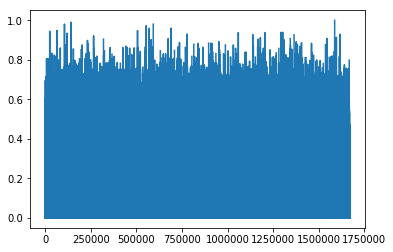

In [47]:
previous_application.RATE_DOWN_PAYMENT.plot()

In [48]:
previous_application.RATE_DOWN_PAYMENT.describe()

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [49]:
previous_application.RATE_DOWN_PAYMENT.fillna(previous_application.RATE_DOWN_PAYMENT.median(),inplace=True)

In [50]:
previous_application.AMT_DOWN_PAYMENT.describe()

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

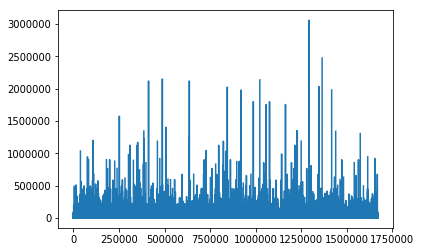

In [51]:
previous_application.AMT_DOWN_PAYMENT.plot()

In [52]:
previous_application.AMT_DOWN_PAYMENT.fillna(0.0,inplace=True)

In [53]:
previous_application.NFLAG_INSURED_ON_APPROVAL.fillna(0,inplace=True)

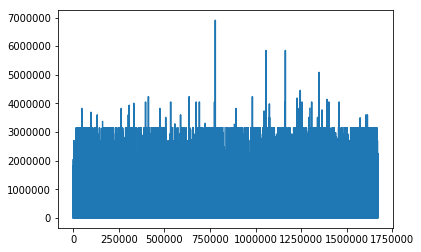

In [54]:
previous_application.AMT_GOODS_PRICE.plot()

In [55]:
previous_application.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [56]:
previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.mean(),inplace=True)

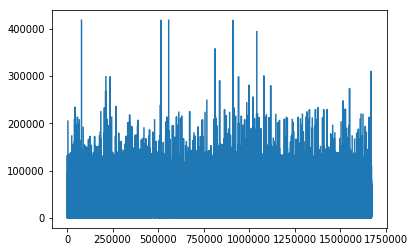

In [57]:
previous_application.AMT_ANNUITY.plot()

In [58]:
previous_application.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [59]:
previous_application.AMT_ANNUITY.fillna(previous_application.AMT_ANNUITY.mean(),inplace=True)

In [60]:
previous_application.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [61]:
previous_application.CNT_PAYMENT.fillna(previous_application.CNT_PAYMENT.median(),inplace=True)

In [62]:
#previous_application[["DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE","DAYS_FIRST_DRAWING","DAYS_TERMINATION"]]

In [63]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,35,Connectivity,12.0,middle,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,...,-1,XNA,36.0,low_action,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,...,-1,XNA,12.0,high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,...,-1,XNA,12.0,middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,...,-1,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN,0.0


In [64]:
previous_application_onehot=onehot_encoding(previous_application,categorical_features(previous_application))

In [65]:
#previous_application_onehot.head()

In [66]:
cnt_id_prev1=previous_application_onehot[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').size()

In [67]:
previous_application_mean=previous_application_onehot.groupby('SK_ID_CURR').mean().drop('SK_ID_PREV',axis=1)
previous_application_mean['cnt_id_prev1']=cnt_id_prev1
previous_application_mean.fillna(0,inplace=True)
previous_application_mean.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,...,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_YIELD_GROUP_XNA,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,cnt_id_prev1
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.00000,24835.50,23787.00,2520.0,24835.500000,13.000000,1.0,0.104326,-1740.0,23.0,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,1
100002,9251.77500,179055.00,179055.00,0.0,179055.000000,9.000000,1.0,0.000000,-606.0,500.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1
100003,56553.99000,435436.50,484191.00,2295.0,435436.500000,14.666667,1.0,0.050555,-1305.0,533.0,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.666667,3
100004,5357.25000,24282.00,20106.00,4860.0,24282.000000,5.000000,1.0,0.212008,-815.0,30.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,1
100005,10384.16033,22308.75,20076.75,2232.0,136232.389642,10.500000,1.0,0.080285,-536.0,18.0,...,0.0,0.0,0.0,0.500000,0.5,0.5,0.0,0.000000,0.000000,2


In [68]:
previous_application_min=previous_application_onehot.groupby('SK_ID_CURR').min().drop('SK_ID_PREV',axis=1)

previous_application_max=previous_application_onehot.groupby('SK_ID_CURR').max().drop('SK_ID_PREV',axis=1)

previous_application_median=previous_application_onehot.groupby('SK_ID_CURR').median().drop('SK_ID_PREV',axis=1)


In [69]:
previous_application_merge=previous_application_mean.merge(previous_application_min,on='SK_ID_CURR').merge(previous_application_max,on='SK_ID_CURR').merge(previous_application_median,on='SK_ID_CURR')
previous_application_merge['cnt_id_prev1']=cnt_id_prev1
previous_application_merge.fillna(0,inplace=True)
previous_application_merge.head()

,AMT_ANNUITY_x,AMT_APPLICATION_x,AMT_CREDIT_x,AMT_DOWN_PAYMENT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY_x,RATE_DOWN_PAYMENT_x,DAYS_DECISION_x,SELLERPLACE_AREA_x,...,NAME_SELLER_INDUSTRY_Industry_y,NAME_SELLER_INDUSTRY_Jewelry_y,NAME_SELLER_INDUSTRY_MLM partners_y,NAME_SELLER_INDUSTRY_Tourism_y,NAME_SELLER_INDUSTRY_XNA_y,NAME_YIELD_GROUP_XNA_y,NAME_YIELD_GROUP_high_y,NAME_YIELD_GROUP_low_action_y,NAME_YIELD_GROUP_low_normal_y,NAME_YIELD_GROUP_middle_y
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.00000,24835.50,23787.00,2520.0,24835.500000,13.000000,1.0,0.104326,-1740.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100002,9251.77500,179055.00,179055.00,0.0,179055.000000,9.000000,1.0,0.000000,-606.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100003,56553.99000,435436.50,484191.00,2295.0,435436.500000,14.666667,1.0,0.050555,-1305.0,533.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100004,5357.25000,24282.00,20106.00,4860.0,24282.000000,5.000000,1.0,0.212008,-815.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100005,10384.16033,22308.75,20076.75,2232.0,136232.389642,10.500000,1.0,0.080285,-536.0,18.0,...,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0


In [ ]:
previous_application_agg=previous_application_onehot.groupby('SK_ID_CURR').agg(['min','max','mean','median','sum']).drop('SK_ID_PREV',axis=1)
previous_application_agg['cnt_id_prev1']=cnt_id_prev1
previous_application_agg.fillna(0,inplace=True)
previous_application_agg.head()

### pre-processing POS_CASH_balance.csv

In [70]:
basic_info(POS_CASH_balance)

Num of rows and columns:  (10001358, 8)
Missing value status:  True
Columns names:
  ['SK_ID_PREV' 'SK_ID_CURR' 'MONTHS_BALANCE' 'CNT_INSTALMENT'
 'CNT_INSTALMENT_FUTURE' 'NAME_CONTRACT_STATUS' 'SK_DPD' 'SK_DPD_DEF']


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [71]:
POS_CASH_balance.NAME_CONTRACT_STATUS.value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [72]:
check_missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [73]:
POS_CASH_balance.CNT_INSTALMENT_FUTURE.describe()

count    9.975271e+06
mean     1.048384e+01
std      1.110906e+01
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      8.500000e+01
Name: CNT_INSTALMENT_FUTURE, dtype: float64

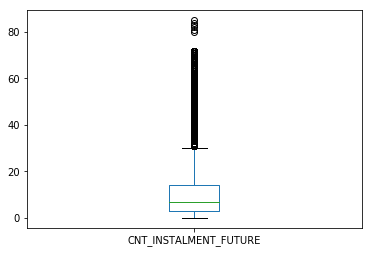

In [74]:
POS_CASH_balance.CNT_INSTALMENT_FUTURE.plot(kind='box')

In [75]:
POS_CASH_balance.CNT_INSTALMENT_FUTURE.fillna(POS_CASH_balance.CNT_INSTALMENT_FUTURE.median(),inplace=True)

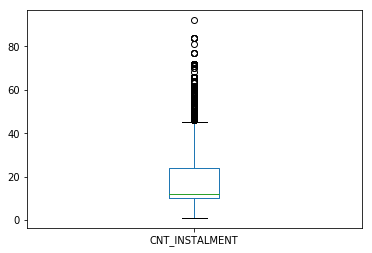

In [76]:
POS_CASH_balance.CNT_INSTALMENT.plot(kind='box')

In [77]:
POS_CASH_balance.CNT_INSTALMENT.describe()

count    9.975287e+06
mean     1.708965e+01
std      1.199506e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      9.200000e+01
Name: CNT_INSTALMENT, dtype: float64

In [78]:
POS_CASH_balance.drop('CNT_INSTALMENT',axis=1,inplace=True)

In [79]:
POS_CASH_balance_onehot=onehot_encoding(POS_CASH_balance,categorical_features(POS_CASH_balance))
POS_CASH_balance_onehot.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,1803195,182943,-31,45.0,0,0,1,0,0,0,0,0,0,0,0
1,1715348,367990,-33,35.0,0,0,1,0,0,0,0,0,0,0,0
2,1784872,397406,-32,9.0,0,0,1,0,0,0,0,0,0,0,0
3,1903291,269225,-35,42.0,0,0,1,0,0,0,0,0,0,0,0
4,2341044,334279,-35,35.0,0,0,1,0,0,0,0,0,0,0,0


In [80]:
cnt_id_prev2=POS_CASH_balance_onehot[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').size()

In [81]:
POS_CASH_balance_median=POS_CASH_balance_onehot.groupby('SK_ID_CURR').median().drop('SK_ID_PREV',axis=1)
POS_CASH_balance_median['cnt_id_prev2']=cnt_id_prev2
POS_CASH_balance_median.fillna(0,inplace=True)
POS_CASH_balance_median.head()

,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,cnt_id_prev2
SK_ID_CURR,,,,,,,,,,,,,,
100001,-57.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
100002,-10.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
100003,-26.5,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28
100004,-25.5,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
100005,-20.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [ ]:
POS_CASH_balance_agg=POS_CASH_balance_onehot.groupby('SK_ID_CURR').agg(['min','max','mean','median','sum']).drop('SK_ID_PREV',axis=1)
POS_CASH_balance_agg['cnt_id_prev2']=cnt_id_prev2
POS_CASH_balance_agg.fillna(0,inplace=True)
POS_CASH_balance_agg.head()

### Pre-processing credit_card_balance.csv

In [82]:
basic_info(credit_card_balance)

Num of rows and columns:  (3840312, 23)
Missing value status:  True
Columns names:
  ['SK_ID_PREV' 'SK_ID_CURR' 'MONTHS_BALANCE' 'AMT_BALANCE'
 'AMT_CREDIT_LIMIT_ACTUAL' 'AMT_DRAWINGS_ATM_CURRENT'
 'AMT_DRAWINGS_CURRENT' 'AMT_DRAWINGS_OTHER_CURRENT'
 'AMT_DRAWINGS_POS_CURRENT' 'AMT_INST_MIN_REGULARITY'
 'AMT_PAYMENT_CURRENT' 'AMT_PAYMENT_TOTAL_CURRENT'
 'AMT_RECEIVABLE_PRINCIPAL' 'AMT_RECIVABLE' 'AMT_TOTAL_RECEIVABLE'
 'CNT_DRAWINGS_ATM_CURRENT' 'CNT_DRAWINGS_CURRENT'
 'CNT_DRAWINGS_OTHER_CURRENT' 'CNT_DRAWINGS_POS_CURRENT'
 'CNT_INSTALMENT_MATURE_CUM' 'NAME_CONTRACT_STATUS' 'SK_DPD' 'SK_DPD_DEF']


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [83]:
check_missing_data(credit_card_balance).head()

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872


In [84]:
categorical_features(credit_card_balance)

['NAME_CONTRACT_STATUS']

In [85]:
credit_card_balance.NAME_CONTRACT_STATUS.value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [86]:
credit_card_balance_onehot=onehot_encoding(credit_card_balance,categorical_features(credit_card_balance))

In [87]:
credit_card_balance_onehot.fillna(credit_card_balance_onehot.median(),inplace=True)
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [88]:
cnt_id_prev3=credit_card_balance_onehot[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').size()

In [89]:
credit_card_balance_median=credit_card_balance_onehot.groupby('SK_ID_CURR').median().drop('SK_ID_PREV',axis=1)
credit_card_balance_median['cnt_id_prev3']=cnt_id_prev3
credit_card_balance_median.fillna(0,inplace=True)
credit_card_balance_median.head()

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,...,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed,cnt_id_prev3
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-3.5,0.0,270000.0,0.0,0.0,0.0,0.0,0.0,2702.700,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
100011,-38.5,0.0,180000.0,0.0,0.0,0.0,0.0,0.0,563.355,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,74
100013,-48.5,0.0,157500.0,0.0,0.0,0.0,0.0,0.0,274.320,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,96
100021,-10.0,0.0,675000.0,0.0,0.0,0.0,0.0,0.0,2702.700,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17
100023,-7.5,0.0,135000.0,0.0,0.0,0.0,0.0,0.0,2702.700,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
credit_card_balance_agg=credit_card_balance_onehot.groupby('SK_ID_CURR').agg(['min','max','mean','median','sum']).drop('SK_ID_PREV',axis=1)
credit_card_balance_agg['cnt_id_prev3']=cnt_id_prev3
credit_card_balance_agg.fillna(0,inplace=True)
credit_card_balance_agg.head()

### pre-processing installments_payments.csv

In [90]:
basic_info(installments_payments)

Num of rows and columns:  (13605401, 8)
Missing value status:  True
Columns names:
  ['SK_ID_PREV' 'SK_ID_CURR' 'NUM_INSTALMENT_VERSION'
 'NUM_INSTALMENT_NUMBER' 'DAYS_INSTALMENT' 'DAYS_ENTRY_PAYMENT'
 'AMT_INSTALMENT' 'AMT_PAYMENT']


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [91]:
check_missing_data(installments_payments)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [92]:
categorical_features(installments_payments)

[]

In [93]:
installments_payments.dropna(inplace=True)

In [94]:
cnt_id_prev4=installments_payments[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').size()

In [95]:
installments_payments_min=installments_payments.groupby('SK_ID_CURR').min().drop('SK_ID_PREV',axis=1)
installments_payments_max=installments_payments.groupby('SK_ID_CURR').max().drop('SK_ID_PREV',axis=1)
installments_payments_median=installments_payments.groupby('SK_ID_CURR').median().drop('SK_ID_PREV',axis=1)

In [96]:
installments_payments_merge=installments_payments_min.merge(installments_payments_max,on='SK_ID_CURR').merge(installments_payments_median,on='SK_ID_CURR')

In [97]:
installments_payments_merge['cnt_id_prev4']=cnt_id_prev4
installments_payments_merge.fillna(0,inplace=True)
installments_payments_merge.head()

,NUM_INSTALMENT_VERSION_x,NUM_INSTALMENT_NUMBER_x,DAYS_INSTALMENT_x,DAYS_ENTRY_PAYMENT_x,AMT_INSTALMENT_x,AMT_PAYMENT_x,NUM_INSTALMENT_VERSION_y,NUM_INSTALMENT_NUMBER_y,DAYS_INSTALMENT_y,DAYS_ENTRY_PAYMENT_y,AMT_INSTALMENT_y,AMT_PAYMENT_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,cnt_id_prev4
SK_ID_CURR,,,,,,,,,,,,,,,,,,,
100001,1.0,1,-2916.0,-2916.0,3951.000,3951.000,2.0,4,-1619.0,-1628.0,17397.900,17397.900,1.0,3.0,-1709.0,-1715.0,3980.925,3980.925,7
100002,1.0,1,-565.0,-587.0,9251.775,9251.775,2.0,19,-25.0,-49.0,53093.745,53093.745,1.0,10.0,-295.0,-312.0,9251.775,9251.775,19
100003,1.0,1,-2310.0,-2324.0,6662.970,6662.970,2.0,12,-536.0,-544.0,560835.360,560835.360,1.0,5.0,-797.0,-806.0,64275.615,64275.615,25
100004,1.0,1,-784.0,-795.0,5357.250,5357.250,2.0,3,-724.0,-727.0,10573.965,10573.965,1.0,2.0,-754.0,-763.0,5357.250,5357.250,3
100005,1.0,1,-706.0,-736.0,4813.200,4813.200,2.0,9,-466.0,-470.0,17656.245,17656.245,1.0,5.0,-586.0,-585.0,4813.200,4813.200,9


In [ ]:
installments_payments_agg=installments_payments.groupby('SK_ID_CURR').agg(['min','max','mean','median','sum']).drop('SK_ID_PREV',axis=1)
installments_payments_agg['cnt_id_prev4']=cnt_id_prev4
installments_payments_agg.fillna(0,inplace=True)
installments_payments_agg.head()

### Pre-processing application_{train|test}.csv

In [98]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
application_test.tail()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [100]:
target=application_train['TARGET']

In [101]:
application_train.drop('TARGET',axis=1,inplace=True)

In [102]:
application_train['TARGET']=target
application_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [103]:
application_test['TARGET']=-999

In [104]:
df=pd.concat([application_train,application_test])

In [105]:
check_missing_data(df).head()

,Total,Percent
COMMONAREA_MEDI,248360,69.714109
COMMONAREA_AVG,248360,69.714109
COMMONAREA_MODE,248360,69.714109
NONLIVINGAPARTMENTS_MEDI,246861,69.293343
NONLIVINGAPARTMENTS_MODE,246861,69.293343


In [106]:
categorical_features(df)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [107]:
df_onehot=onehot_encoding(df,categorical_features(df))
df_onehot.shape

(356255, 246)

In [108]:
df_onehot.fillna(df_onehot.median(),inplace=True)

In [109]:
check_missing_data(df_onehot).head()

,Total,Percent
EMERGENCYSTATE_MODE_Yes,0,0.0
FLAG_DOCUMENT_14,0,0.0
FLAG_DOCUMENT_12,0,0.0
FLAG_DOCUMENT_11,0,0.0
FLAG_DOCUMENT_10,0,0.0


### Merging All the dataset

In [110]:
total=df_onehot.merge(right=bureau_final_median,on='SK_ID_CURR',how='left').merge(right=previous_application_merge,on='SK_ID_CURR',how='left').merge(right=POS_CASH_balance_median,on='SK_ID_CURR',how='left').merge(right=credit_card_balance_median,on='SK_ID_CURR',how='left').merge(right=installments_payments_merge,on='SK_ID_CURR',how='left')

total.shape

(356255, 895)

In [111]:
df_total=total.fillna(0)
df_total.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_ENTRY_PAYMENT_y,AMT_INSTALMENT_y,AMT_PAYMENT_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,cnt_id_prev4
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,-49.0,53093.745,53093.745,1.0,10.0,-295.0,-312.0,9251.775,9251.775,19.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,-544.0,560835.360,560835.360,1.0,5.0,-797.0,-806.0,64275.615,64275.615,25.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,-727.0,10573.965,10573.965,1.0,2.0,-754.0,-763.0,5357.250,5357.250,3.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,-12.0,691786.890,691786.890,1.0,4.0,-206.0,-211.0,29027.520,29027.520,16.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,-14.0,22678.785,22678.785,1.0,7.0,-851.0,-852.5,16037.640,16037.640,66.0


### Final dataset for Machine Learning

In [112]:
df_train=df_total[df_total.TARGET!=-999]
print(df_train.shape)
print(application_train.shape)
df_train.head()

(307511, 895)
(307511, 122)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_ENTRY_PAYMENT_y,AMT_INSTALMENT_y,AMT_PAYMENT_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,cnt_id_prev4
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,-49.0,53093.745,53093.745,1.0,10.0,-295.0,-312.0,9251.775,9251.775,19.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,-544.0,560835.360,560835.360,1.0,5.0,-797.0,-806.0,64275.615,64275.615,25.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,-727.0,10573.965,10573.965,1.0,2.0,-754.0,-763.0,5357.250,5357.250,3.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,-12.0,691786.890,691786.890,1.0,4.0,-206.0,-211.0,29027.520,29027.520,16.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,-14.0,22678.785,22678.785,1.0,7.0,-851.0,-852.5,16037.640,16037.640,66.0


In [113]:
df_test=df_total[df_total.TARGET==-999]
print(df_test.shape)
print(application_test.shape)
df_test.head()

(48744, 895)
(48744, 122)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_ENTRY_PAYMENT_y,AMT_INSTALMENT_y,AMT_PAYMENT_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,cnt_id_prev4
307511,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,-1628.0,17397.900,17397.900,1.0,3.0,-1709.0,-1715.0,3980.925,3980.925,7.0
307512,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,-470.0,17656.245,17656.245,1.0,5.0,-586.0,-585.0,4813.200,4813.200,9.0
307513,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,-14.0,357347.745,357347.745,0.0,37.0,-1383.0,-1383.0,1125.000,688.545,155.0
307514,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,-29.0,38988.540,38988.540,0.0,26.0,-812.0,-812.0,5897.520,4650.300,113.0
307515,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,-466.0,11100.600,11100.600,1.0,6.5,-622.0,-634.0,11100.600,11100.600,12.0


### saving final dataset for ML

In [ ]:
# df_train.to_csv('train_dataset.csv',index=False)
# df_test.to_csv('test_dataset.csv',index=False)

### loadind dataset

In [ ]:
# df_train=pd.read_csv('train_dataset.csv')
# df_test=pd.read_csv('test_dataset.csv')

In [114]:
test=df_test.drop(columns=["SK_ID_CURR",'TARGET'],axis=1)
test.shape

(48744, 893)

In [115]:
y=df_train['TARGET'].values
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [116]:
train=df_train.drop(columns=["SK_ID_CURR",'TARGET'],axis=1)
train.shape

(307511, 893)

### Splitting into train and test set

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(train.values,y,test_size=0.2)

In [119]:
import lightgbm

In [120]:
train_data=lightgbm.Dataset(X_train,label=y_train)
valid_data=lightgbm.Dataset(X_test,label=y_test)

In [133]:

params = {'boosting_type': 'gbdt',
          'max_depth' : 5,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.1,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.005,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }

In [134]:
lgbm = lightgbm.train(params,
                 train_data,
                 25000,
                 valid_sets=valid_data,
                 early_stopping_rounds= 80,
                 verbose_eval= 10
                 )

Training until validation scores don't improve for 80 rounds.
[10]	valid_0's auc: 0.725327
[20]	valid_0's auc: 0.739258
[30]	valid_0's auc: 0.750811
[40]	valid_0's auc: 0.759516
[50]	valid_0's auc: 0.767277
[60]	valid_0's auc: 0.771492
[70]	valid_0's auc: 0.774676
[80]	valid_0's auc: 0.776919
[90]	valid_0's auc: 0.778746
[100]	valid_0's auc: 0.779997
[110]	valid_0's auc: 0.780895
[120]	valid_0's auc: 0.781882
[130]	valid_0's auc: 0.782618
[140]	valid_0's auc: 0.783067
[150]	valid_0's auc: 0.783925
[160]	valid_0's auc: 0.784229
[170]	valid_0's auc: 0.784667
[180]	valid_0's auc: 0.785077
[190]	valid_0's auc: 0.785219
[200]	valid_0's auc: 0.785503
[210]	valid_0's auc: 0.785985
[220]	valid_0's auc: 0.786426
[230]	valid_0's auc: 0.786675
[240]	valid_0's auc: 0.78696
[250]	valid_0's auc: 0.787261
[260]	valid_0's auc: 0.787417
[270]	valid_0's auc: 0.787623
[280]	valid_0's auc: 0.787567
[290]	valid_0's auc: 0.787823
[300]	valid_0's auc: 0.787893
[310]	valid_0's auc: 0.788102
[320]	valid_0's au

In [123]:
#Predict on test set and write to submit
predictions_lgbm_prob = lgbm.predict(test.values)

In [124]:
sub=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/sample_submission.csv')

In [125]:
sub.TARGET=predictions_lgbm_prob

In [126]:
sub.to_csv('sub12.csv',index=False)

In [135]:
from lightgbm import LGBMClassifier

In [136]:
clf = LGBMClassifier(
        # n_estimators=1000,
        # num_leaves=20,
        # colsample_bytree=.8,
        # subsample=.8,
        # max_depth=7,
        # reg_alpha=.1,
        # reg_lambda=.1,
        # min_split_gain=.01
        n_estimators=4000,
        learning_rate=0.1,
        num_leaves=30,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=5,
        reg_alpha=5,
        reg_lambda=10,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
    )

In [137]:
clf.fit(X_train,y_train,
        eval_set= (X_test,y_test), 
        eval_metric='auc', verbose=100, early_stopping_rounds=100
       )

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.780301
[200]	valid_0's auc: 0.786742
[300]	valid_0's auc: 0.788153
[400]	valid_0's auc: 0.78803
Early stopping, best iteration is:
[365]	valid_0's auc: 0.788418


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        learning_rate=0.1, max_depth=5, min_child_samples=20,
        min_child_weight=2, min_split_gain=0.01, n_estimators=4000,
        n_jobs=-1, num_leaves=30, objective=None, random_state=None,
        reg_alpha=5, reg_lambda=10, silent=-1, subsample=0.9,
        subsample_for_bin=200000, subsample_freq=1, verbose=-1)

In [ ]:
y_hat=clf.predict(X_test)

In [ ]:
y_test.sum()

In [ ]:
y_hat.sum()

In [ ]:
confusion_matrix(y_test,y_hat)

In [ ]:
f1_score(y_test,y_hat)

In [ ]:
y_pred=clf.predict_proba(test.values)

In [ ]:
sub=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/sample_submission.csv')

In [ ]:
sub.TARGET=y_pred

In [ ]:
sub.to_csv('sub8.csv',index=False)

In [142]:
from catboost import CatBoostClassifier

In [175]:
catboost_params= {"iterations": 200,
                  "learning_rate": 0.5,
                  "depth": 5,
                  "l2_leaf_reg":40,
                  "bootstrap_type":'Bernoulli',
                  "subsample":0.7,
#                   "scale_pos_weight":5,
                  "eval_metric":'AUC',
                  "loss_function":'CrossEntropy',
                  "metric_period":20,
                  "od_type":'Iter',
                  "od_wait": 200,
                  "allow_writing_files":False}

In [181]:
cb_model = CatBoostClassifier()
history= cb_model.fit(X_train, y_train,
                      eval_set=(X_test, y_test),cat_features=None,
                      use_best_model=True,verbose=True)

0:	learn: 0.6592916	test: 0.6592777	best: 0.6592777 (0)	total: 998ms	remaining: 16m 36s
1:	learn: 0.6282280	test: 0.6281649	best: 0.6281649 (1)	total: 2.03s	remaining: 16m 52s
2:	learn: 0.5996130	test: 0.5995080	best: 0.5995080 (2)	total: 3.07s	remaining: 16m 59s
3:	learn: 0.5732618	test: 0.5731052	best: 0.5731052 (3)	total: 4.15s	remaining: 17m 13s
4:	learn: 0.5489838	test: 0.5487739	best: 0.5487739 (4)	total: 5.21s	remaining: 17m 16s
5:	learn: 0.5264211	test: 0.5261933	best: 0.5261933 (5)	total: 6.2s	remaining: 17m 6s
6:	learn: 0.5060061	test: 0.5057248	best: 0.5057248 (6)	total: 7.21s	remaining: 17m 3s
7:	learn: 0.4873415	test: 0.4870225	best: 0.4870225 (7)	total: 8.31s	remaining: 17m 10s
8:	learn: 0.4696409	test: 0.4692790	best: 0.4692790 (8)	total: 9.38s	remaining: 17m 13s
9:	learn: 0.4539299	test: 0.4535021	best: 0.4535021 (9)	total: 10.5s	remaining: 17m 19s
10:	learn: 0.4389661	test: 0.4384999	best: 0.4384999 (10)	total: 11.5s	remaining: 17m 16s
11:	learn: 0.4255185	test: 0.4250

92:	learn: 0.2500526	test: 0.2481670	best: 0.2481670 (92)	total: 1m 36s	remaining: 15m 37s
93:	learn: 0.2499255	test: 0.2480339	best: 0.2480339 (93)	total: 1m 36s	remaining: 15m 34s
94:	learn: 0.2497874	test: 0.2478975	best: 0.2478975 (94)	total: 1m 37s	remaining: 15m 32s
95:	learn: 0.2496676	test: 0.2477689	best: 0.2477689 (95)	total: 1m 38s	remaining: 15m 30s
96:	learn: 0.2495667	test: 0.2476599	best: 0.2476599 (96)	total: 1m 39s	remaining: 15m 29s
97:	learn: 0.2494473	test: 0.2475407	best: 0.2475407 (97)	total: 1m 40s	remaining: 15m 27s
98:	learn: 0.2493338	test: 0.2474375	best: 0.2474375 (98)	total: 1m 41s	remaining: 15m 25s
99:	learn: 0.2492472	test: 0.2473518	best: 0.2473518 (99)	total: 1m 42s	remaining: 15m 24s
100:	learn: 0.2491473	test: 0.2472535	best: 0.2472535 (100)	total: 1m 43s	remaining: 15m 23s
101:	learn: 0.2490297	test: 0.2471383	best: 0.2471383 (101)	total: 1m 44s	remaining: 15m 21s
102:	learn: 0.2489440	test: 0.2470464	best: 0.2470464 (102)	total: 1m 45s	remaining: 1

181:	learn: 0.2442835	test: 0.2428894	best: 0.2428894 (181)	total: 3m 8s	remaining: 14m 6s
182:	learn: 0.2442365	test: 0.2428494	best: 0.2428494 (182)	total: 3m 9s	remaining: 14m 5s
183:	learn: 0.2442059	test: 0.2428214	best: 0.2428214 (183)	total: 3m 10s	remaining: 14m 4s
184:	learn: 0.2441641	test: 0.2427922	best: 0.2427922 (184)	total: 3m 11s	remaining: 14m 3s
185:	learn: 0.2441212	test: 0.2427564	best: 0.2427564 (185)	total: 3m 12s	remaining: 14m 1s
186:	learn: 0.2440844	test: 0.2427258	best: 0.2427258 (186)	total: 3m 13s	remaining: 14m
187:	learn: 0.2440493	test: 0.2427001	best: 0.2427001 (187)	total: 3m 14s	remaining: 13m 59s
188:	learn: 0.2440084	test: 0.2426556	best: 0.2426556 (188)	total: 3m 15s	remaining: 13m 57s
189:	learn: 0.2439745	test: 0.2426332	best: 0.2426332 (189)	total: 3m 16s	remaining: 13m 56s
190:	learn: 0.2439423	test: 0.2426088	best: 0.2426088 (190)	total: 3m 17s	remaining: 13m 54s
191:	learn: 0.2438968	test: 0.2425744	best: 0.2425744 (191)	total: 3m 18s	remaini

270:	learn: 0.2417487	test: 0.2410196	best: 0.2410196 (270)	total: 4m 40s	remaining: 12m 35s
271:	learn: 0.2417234	test: 0.2410010	best: 0.2410010 (271)	total: 4m 41s	remaining: 12m 34s
272:	learn: 0.2416899	test: 0.2409768	best: 0.2409768 (272)	total: 4m 43s	remaining: 12m 33s
273:	learn: 0.2416727	test: 0.2409621	best: 0.2409621 (273)	total: 4m 44s	remaining: 12m 32s
274:	learn: 0.2416509	test: 0.2409399	best: 0.2409399 (274)	total: 4m 45s	remaining: 12m 31s
275:	learn: 0.2416343	test: 0.2409374	best: 0.2409374 (275)	total: 4m 46s	remaining: 12m 30s
276:	learn: 0.2416113	test: 0.2409167	best: 0.2409167 (276)	total: 4m 47s	remaining: 12m 29s
277:	learn: 0.2415973	test: 0.2409077	best: 0.2409077 (277)	total: 4m 48s	remaining: 12m 28s
278:	learn: 0.2415780	test: 0.2408859	best: 0.2408859 (278)	total: 4m 49s	remaining: 12m 27s
279:	learn: 0.2415637	test: 0.2408806	best: 0.2408806 (279)	total: 4m 50s	remaining: 12m 26s
280:	learn: 0.2415353	test: 0.2408538	best: 0.2408538 (280)	total: 4m 

359:	learn: 0.2401679	test: 0.2401067	best: 0.2401067 (359)	total: 6m 17s	remaining: 11m 10s
360:	learn: 0.2401565	test: 0.2401044	best: 0.2401044 (360)	total: 6m 18s	remaining: 11m 9s
361:	learn: 0.2401452	test: 0.2401007	best: 0.2401007 (361)	total: 6m 19s	remaining: 11m 8s
362:	learn: 0.2401289	test: 0.2400913	best: 0.2400913 (362)	total: 6m 20s	remaining: 11m 7s
363:	learn: 0.2401121	test: 0.2400826	best: 0.2400826 (363)	total: 6m 21s	remaining: 11m 6s
364:	learn: 0.2401048	test: 0.2400792	best: 0.2400792 (364)	total: 6m 22s	remaining: 11m 5s
365:	learn: 0.2400953	test: 0.2400723	best: 0.2400723 (365)	total: 6m 23s	remaining: 11m 4s
366:	learn: 0.2400735	test: 0.2400521	best: 0.2400521 (366)	total: 6m 24s	remaining: 11m 3s
367:	learn: 0.2400595	test: 0.2400483	best: 0.2400483 (367)	total: 6m 25s	remaining: 11m 2s
368:	learn: 0.2400459	test: 0.2400440	best: 0.2400440 (368)	total: 6m 26s	remaining: 11m 1s
369:	learn: 0.2400306	test: 0.2400312	best: 0.2400312 (369)	total: 6m 27s	remai

448:	learn: 0.2389287	test: 0.2394690	best: 0.2394690 (448)	total: 7m 59s	remaining: 9m 48s
449:	learn: 0.2389181	test: 0.2394602	best: 0.2394602 (449)	total: 8m	remaining: 9m 47s
450:	learn: 0.2389035	test: 0.2394488	best: 0.2394488 (450)	total: 8m 2s	remaining: 9m 46s
451:	learn: 0.2388976	test: 0.2394453	best: 0.2394453 (451)	total: 8m 3s	remaining: 9m 46s
452:	learn: 0.2388877	test: 0.2394429	best: 0.2394429 (452)	total: 8m 4s	remaining: 9m 45s
453:	learn: 0.2388770	test: 0.2394385	best: 0.2394385 (453)	total: 8m 5s	remaining: 9m 44s
454:	learn: 0.2388624	test: 0.2394326	best: 0.2394326 (454)	total: 8m 7s	remaining: 9m 43s
455:	learn: 0.2388567	test: 0.2394323	best: 0.2394323 (455)	total: 8m 8s	remaining: 9m 42s
456:	learn: 0.2388412	test: 0.2394273	best: 0.2394273 (456)	total: 8m 9s	remaining: 9m 41s
457:	learn: 0.2388321	test: 0.2394252	best: 0.2394252 (457)	total: 8m 10s	remaining: 9m 41s
458:	learn: 0.2388238	test: 0.2394250	best: 0.2394250 (458)	total: 8m 12s	remaining: 9m 40s

538:	learn: 0.2378795	test: 0.2389556	best: 0.2389556 (538)	total: 9m 44s	remaining: 8m 19s
539:	learn: 0.2378664	test: 0.2389451	best: 0.2389451 (539)	total: 9m 45s	remaining: 8m 19s
540:	learn: 0.2378578	test: 0.2389441	best: 0.2389441 (540)	total: 9m 47s	remaining: 8m 18s
541:	learn: 0.2378451	test: 0.2389340	best: 0.2389340 (541)	total: 9m 48s	remaining: 8m 16s
542:	learn: 0.2378284	test: 0.2389281	best: 0.2389281 (542)	total: 9m 49s	remaining: 8m 15s
543:	learn: 0.2378196	test: 0.2389266	best: 0.2389266 (543)	total: 9m 50s	remaining: 8m 14s
544:	learn: 0.2378074	test: 0.2389183	best: 0.2389183 (544)	total: 9m 51s	remaining: 8m 13s
545:	learn: 0.2377963	test: 0.2389146	best: 0.2389146 (545)	total: 9m 52s	remaining: 8m 12s
546:	learn: 0.2377828	test: 0.2389118	best: 0.2389118 (546)	total: 9m 53s	remaining: 8m 11s
547:	learn: 0.2377677	test: 0.2389023	best: 0.2389023 (547)	total: 9m 55s	remaining: 8m 10s
548:	learn: 0.2377527	test: 0.2388964	best: 0.2388964 (548)	total: 9m 56s	remain

627:	learn: 0.2369859	test: 0.2385920	best: 0.2385920 (627)	total: 11m 21s	remaining: 6m 43s
628:	learn: 0.2369683	test: 0.2385830	best: 0.2385830 (628)	total: 11m 22s	remaining: 6m 42s
629:	learn: 0.2369577	test: 0.2385837	best: 0.2385830 (628)	total: 11m 23s	remaining: 6m 41s
630:	learn: 0.2369486	test: 0.2385754	best: 0.2385754 (630)	total: 11m 24s	remaining: 6m 40s
631:	learn: 0.2369374	test: 0.2385733	best: 0.2385733 (631)	total: 11m 25s	remaining: 6m 39s
632:	learn: 0.2369276	test: 0.2385663	best: 0.2385663 (632)	total: 11m 26s	remaining: 6m 38s
633:	learn: 0.2369128	test: 0.2385533	best: 0.2385533 (633)	total: 11m 27s	remaining: 6m 36s
634:	learn: 0.2369053	test: 0.2385525	best: 0.2385525 (634)	total: 11m 28s	remaining: 6m 35s
635:	learn: 0.2368920	test: 0.2385477	best: 0.2385477 (635)	total: 11m 29s	remaining: 6m 34s
636:	learn: 0.2368858	test: 0.2385437	best: 0.2385437 (636)	total: 11m 30s	remaining: 6m 33s
637:	learn: 0.2368785	test: 0.2385426	best: 0.2385426 (637)	total: 11m

716:	learn: 0.2361201	test: 0.2382958	best: 0.2382958 (716)	total: 12m 56s	remaining: 5m 6s
717:	learn: 0.2361106	test: 0.2382945	best: 0.2382945 (717)	total: 12m 57s	remaining: 5m 5s
718:	learn: 0.2361028	test: 0.2382892	best: 0.2382892 (718)	total: 12m 58s	remaining: 5m 4s
719:	learn: 0.2360954	test: 0.2382865	best: 0.2382865 (719)	total: 13m	remaining: 5m 3s
720:	learn: 0.2360880	test: 0.2382845	best: 0.2382845 (720)	total: 13m 1s	remaining: 5m 2s
721:	learn: 0.2360793	test: 0.2382812	best: 0.2382812 (721)	total: 13m 2s	remaining: 5m 1s
722:	learn: 0.2360756	test: 0.2382800	best: 0.2382800 (722)	total: 13m 3s	remaining: 5m
723:	learn: 0.2360659	test: 0.2382772	best: 0.2382772 (723)	total: 13m 4s	remaining: 4m 59s
724:	learn: 0.2360622	test: 0.2382770	best: 0.2382770 (724)	total: 13m 5s	remaining: 4m 57s
725:	learn: 0.2360515	test: 0.2382734	best: 0.2382734 (725)	total: 13m 6s	remaining: 4m 56s
726:	learn: 0.2360467	test: 0.2382707	best: 0.2382707 (726)	total: 13m 7s	remaining: 4m 55

805:	learn: 0.2352963	test: 0.2380356	best: 0.2380356 (805)	total: 14m 33s	remaining: 3m 30s
806:	learn: 0.2352885	test: 0.2380350	best: 0.2380350 (806)	total: 14m 34s	remaining: 3m 29s
807:	learn: 0.2352789	test: 0.2380313	best: 0.2380313 (807)	total: 14m 35s	remaining: 3m 28s
808:	learn: 0.2352702	test: 0.2380254	best: 0.2380254 (808)	total: 14m 36s	remaining: 3m 26s
809:	learn: 0.2352615	test: 0.2380227	best: 0.2380227 (809)	total: 14m 37s	remaining: 3m 25s
810:	learn: 0.2352537	test: 0.2380201	best: 0.2380201 (810)	total: 14m 38s	remaining: 3m 24s
811:	learn: 0.2352398	test: 0.2380200	best: 0.2380200 (811)	total: 14m 39s	remaining: 3m 23s
812:	learn: 0.2352269	test: 0.2380114	best: 0.2380114 (812)	total: 14m 40s	remaining: 3m 22s
813:	learn: 0.2352137	test: 0.2380038	best: 0.2380038 (813)	total: 14m 41s	remaining: 3m 21s
814:	learn: 0.2352072	test: 0.2380015	best: 0.2380015 (814)	total: 14m 42s	remaining: 3m 20s
815:	learn: 0.2352001	test: 0.2379995	best: 0.2379995 (815)	total: 14m

894:	learn: 0.2345755	test: 0.2378086	best: 0.2378086 (894)	total: 16m 8s	remaining: 1m 53s
895:	learn: 0.2345649	test: 0.2378038	best: 0.2378038 (895)	total: 16m 9s	remaining: 1m 52s
896:	learn: 0.2345543	test: 0.2377992	best: 0.2377992 (896)	total: 16m 10s	remaining: 1m 51s
897:	learn: 0.2345340	test: 0.2377885	best: 0.2377885 (897)	total: 16m 11s	remaining: 1m 50s
898:	learn: 0.2345299	test: 0.2377884	best: 0.2377884 (898)	total: 16m 12s	remaining: 1m 49s
899:	learn: 0.2345262	test: 0.2377899	best: 0.2377884 (898)	total: 16m 13s	remaining: 1m 48s
900:	learn: 0.2345216	test: 0.2377887	best: 0.2377884 (898)	total: 16m 14s	remaining: 1m 47s
901:	learn: 0.2345123	test: 0.2377861	best: 0.2377861 (901)	total: 16m 15s	remaining: 1m 46s
902:	learn: 0.2345025	test: 0.2377832	best: 0.2377832 (902)	total: 16m 16s	remaining: 1m 44s
903:	learn: 0.2344929	test: 0.2377780	best: 0.2377780 (903)	total: 16m 17s	remaining: 1m 43s
904:	learn: 0.2344784	test: 0.2377743	best: 0.2377743 (904)	total: 16m 1

983:	learn: 0.2338267	test: 0.2376038	best: 0.2376038 (983)	total: 17m 44s	remaining: 17.3s
984:	learn: 0.2338160	test: 0.2375955	best: 0.2375955 (984)	total: 17m 45s	remaining: 16.2s
985:	learn: 0.2338067	test: 0.2375923	best: 0.2375923 (985)	total: 17m 46s	remaining: 15.1s
986:	learn: 0.2338003	test: 0.2375891	best: 0.2375891 (986)	total: 17m 47s	remaining: 14.1s
987:	learn: 0.2337957	test: 0.2375894	best: 0.2375891 (986)	total: 17m 48s	remaining: 13s
988:	learn: 0.2337860	test: 0.2375888	best: 0.2375888 (988)	total: 17m 49s	remaining: 11.9s
989:	learn: 0.2337754	test: 0.2375857	best: 0.2375857 (989)	total: 17m 50s	remaining: 10.8s
990:	learn: 0.2337691	test: 0.2375851	best: 0.2375851 (990)	total: 17m 51s	remaining: 9.73s
991:	learn: 0.2337601	test: 0.2375839	best: 0.2375839 (991)	total: 17m 53s	remaining: 8.65s
992:	learn: 0.2337534	test: 0.2375829	best: 0.2375829 (992)	total: 17m 54s	remaining: 7.57s
993:	learn: 0.2337480	test: 0.2375836	best: 0.2375829 (992)	total: 17m 55s	remaini

In [182]:
y_pred=cb_model.predict_proba(test.values)

In [183]:
sub=pd.read_csv('../All_datasets/Home_Credit_Default_Risk_dataset/sample_submission.csv')

In [184]:
sub.TARGET=y_pred

In [185]:
sub.to_csv('sub13.csv',index=False)